# 1. IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
warnings.filterwarnings("ignore")
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

%matplotlib inline

In [2]:
os.getcwd()

'E:\\My_Model\\Identifying_Age-Related'

# 2. LOADING DATASET


In [3]:
path = r"E:/My_Model/Identifying_Age-Related/data"

In [4]:
dataset = pd.read_csv(f"{path}/train.csv")
dataset.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...        FL        FR  \
0  0.699861  0.025578   9.812214    5.555634  ...  7.298162   1.73855   
1  3.632190  0.025578  13.517790    1.229900  ...  0.173229   0.49706   
2  6.732840  0.025578  12.824570    1.229900  ...  7.709560   0.97556   
3  3.685344  0.025578  11.053708    1.229900  ...  6.122162   0.49706   
4  3.942255  0.054810   3.396778  102.151980  ...  8.153058  48.50134   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  Class  
0   0.120343      1  
1  21.978000      0  
2   0.196941      0  
3   0.155829      0  
4   0.096614      1  

[5 rows x 58 columns]

# 3. DATA DESCRIPTION

***The  data comprises over fifty anonymized health characteristics linked to three age-related conditions. our goal is to predict whether a subject has or has not been diagnosed with one of these conditions -- a binary classification problem.***




- Id Unique identifier for each observation.
- AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
- Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not. ##### test.csv - The test set.
- Your goal is to predict the probability that a subject in this set belongs to each of the two classes.

- Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected

# 4. EXPLORATORY DATA ANALYSIS

In [5]:
# get the info of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [6]:
print("shape of the dataset :-", dataset.shape)
print("*"*50)
print("columns in dataset :-", dataset.columns)
print("*"*50)
print("number of unique values the dataset:-\n", dataset.nunique())
print("*"*50)
print("Number of Duplicate Recoreds in dataset:-",dataset.duplicated().sum())

shape of the dataset :- (617, 58)
**************************************************
columns in dataset :- Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')
**************************************************
number of unique values the dataset:-
 Id       617
AB       217
AF       599
AH       227
AM       605
AR       130
AX       427
AY       148
AZ       484
BC       259
BD       617
BN        53
BP       612
BQ       515
BR       566
BZ       115
CB       553
CC       602
CD       584
CF       586
CH       135
CL       123
CR       595
CS       576
CU       307
CW       426
DA       611
DE       616
DF       137
DH       191


In [7]:
## separating numeric and categorical columns:
def cat_and_num_cols(dataframe, target_col_th = 2):
    cat_cols = [col  for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    target_col = dataframe.columns[-1]


    print(f"Observations :- {dataframe.shape[0]}")
    print(f"Variables   :-   {dataframe.shape[1]}")
    print(f"Numeric columns:- {len(num_cols)}")
    print(f"categorical columns :- {len(cat_cols)}")
    print(f"Target column:- ", target_col)
    
    return cat_cols, num_cols

categorical_cols, numeric_columns = cat_and_num_cols(dataset)

Observations :- 617
Variables   :-   58
Numeric columns:- 56
categorical columns :- 2
Target column:-  Class


In [8]:
# plot categorical distribution :

cat_col = [col for col in dataset.columns if dataset[col].dtype == "O" and dataset[col].nunique() <= 12]
print(cat_col)

def plot_categorical_cols(data, column):
    df = pd.DataFrame(
        {
            column:data[column].value_counts(),
            "Ratio": round(100*data[column].value_counts()/len(data),2)
        }
    )
    plt.figure(figsize=(5,4))
    sns.countplot(data=data, x=column, palette="Set2")
    plt.title(f"Distribution of {column}")
    return df

['EJ']


EJ  Ratio
EJ            
B   395  64.02
A   222  35.98

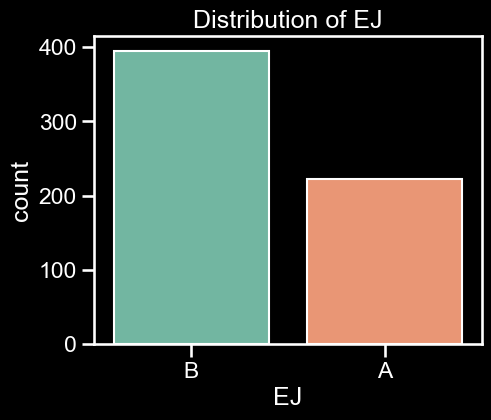

In [9]:
plot_categorical_cols(dataset, "EJ")

Class  Ratio
Class              
0        509   82.5
1        108   17.5

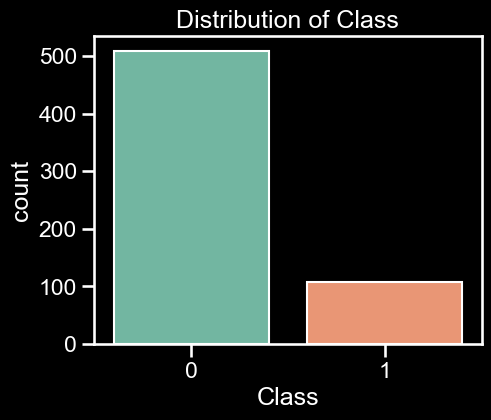

In [10]:
plot_categorical_cols(dataset, "Class")

In [11]:
# ploting numerical columns:
num_col = [col for col in numeric_columns if dataset[col].dtype != "O" and col not in ["Id", "Class"]]

def plot_histogram(data, hue="Class", fontsize=20,figuresize=(16,20), kde=False):
    fig = plt.figure(figsize=figuresize)
    for idx, col in enumerate(data.select_dtypes(include='float64')):
       ax = plt.subplot(11,5, idx + 1)
       sns.histplot(data=data, hue=hue, fill=True, kde=kde,
       x=col, palette=['#0ea5e9', '#d97706'], legend=False)
       ax.set_ylabel(''); ax.spines['top'].set_visible(False),
       ax.set_xlabel(''); ax.spines['right'].set_visible(False)
       ax.set_title(f'{col}', loc='right',
       weight='bold', fontsize=fontsize)
       fig.suptitle(f'Features vs Target\n\n\n', ha='center', fontweight='bold', fontsize=fontsize)
       fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
    plt.tight_layout()
    plt.show()

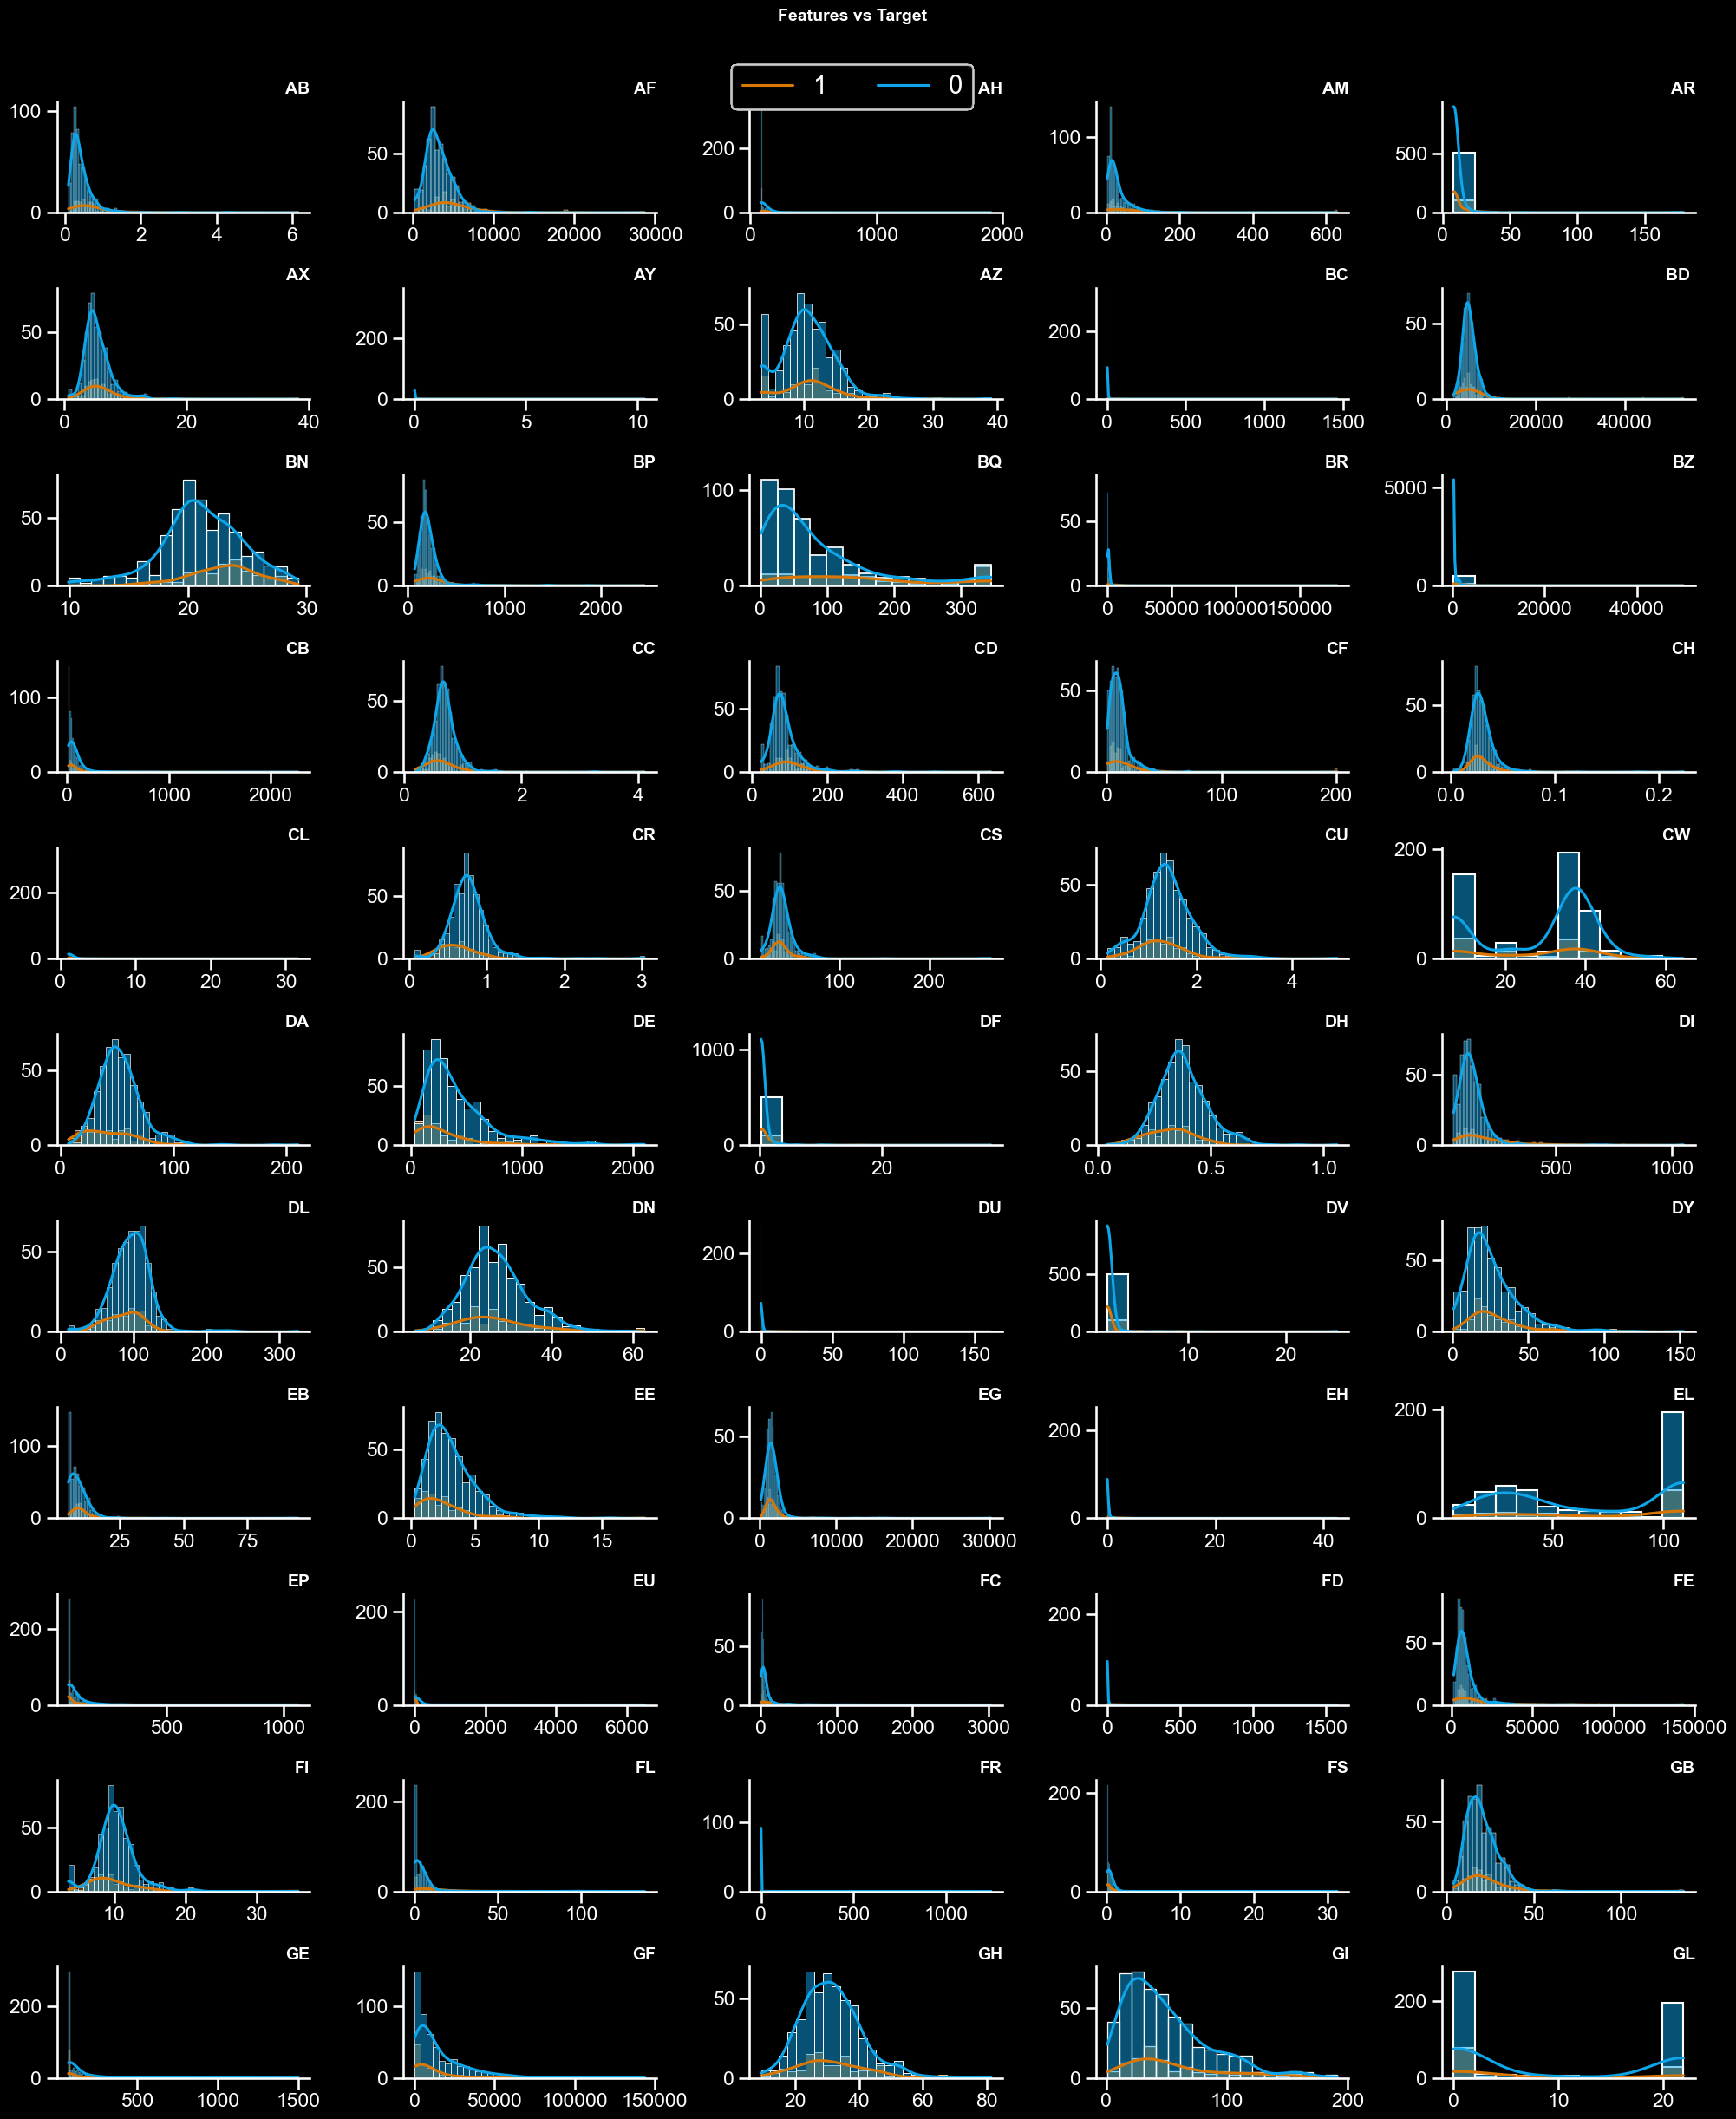

In [12]:
plot_histogram(data=dataset, hue="Class", figuresize=(20,25), fontsize=14, kde=True)

In [13]:
dataset.describe()

AB            AF           AH          AM          AR  \
count  617.000000    617.000000   617.000000  617.000000  617.000000   
mean     0.477149   3502.013221   118.624513   38.968552   10.128242   
std      0.468388   2300.322717   127.838950   69.728226   10.518877   
min      0.081187    192.593280    85.200147    3.177522    8.138688   
25%      0.252107   2197.345480    85.200147   12.270314    8.138688   
50%      0.354659   3120.318960    85.200147   20.533110    8.138688   
75%      0.559763   4361.637390   113.739540   39.139886    8.138688   
max      6.161666  28688.187660  1910.123198  630.518230  178.943634   

               AX          AY          AZ           BC           BD   ...  \
count  617.000000  617.000000  617.000000   617.000000    617.000000  ...   
mean     5.545576    0.060320   10.566447     8.053012   5350.388655  ...   
std      2.551696    0.416817    4.350645    65.166943   3021.326641  ...   
min      0.699861    0.025578    3.396778     1.229900   1693.624320  ...   
25%      4.128294    0.025578    8.129580     1.229900   4155.702870  ...   
50%      5.031912    0.025578   10.461320     1.229900   4997.960730  ...   
75%      6.431634    0.036845   12.969516     5.081244   6035.885700  ...   
max     38.270880   10.315851   38.971568  1463.693448  53060.599240  ...   

               FL           FR          FS          GB           GE  \
count  616.000000   617.000000  615.000000  617.000000   617.000000   
mean     5.433199     3.533905    0.421501   20.724856   131.714987   
std     11.496257    50.181948    1.305365    9.991907   144.181524   
min      0.173229     0.497060    0.067730    4.102182    72.611063   
25%      0.173229     0.497060    0.067730   14.036718    72.611063   
50%      3.028141     1.131000    0.250601   18.771436    72.611063   
75%      6.238814     1.512060    0.535067   25.608406   127.591671   
max    137.932739  1244.227020   31.365763  135.781294  1497.351958   

                  GF          GH          GI          GL       Class  
count     617.000000  617.000000  617.000000  616.000000  617.000000  
mean    14679.595398   31.489716   50.584437    8.530961    0.175041  
std     19352.959387    9.864239   36.266251   10.327010    0.380310  
min        13.038894    9.432735    0.897628    0.001129    0.000000  
25%      2798.992584   25.034888   23.011684    0.124392    0.000000  
50%      7838.273610   30.608946   41.007968    0.337827    0.000000  
75%     19035.709240   36.863947   67.931664   21.978000    0.000000  
max    143790.071200   81.210825  191.194764   21.978000    1.000000  

[8 rows x 56 columns]

## 5. FEATURE ENGINEERING

### 6. MISSING VALUES

In [14]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df, na_columns

missing_info, nan_col = missing_values_tabl(dataset)

In [15]:
missing_info

n_miss  ratio
BQ      60   9.72
EL      60   9.72
CC       3   0.49
CB       2   0.32
FS       2   0.32
DU       1   0.16
FC       1   0.16
FL       1   0.16
GL       1   0.16

In [16]:
nan_col

['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL']

In [17]:
# import KNNImputer to deal with missing values
from sklearn.impute import KNNImputer

def knn_impute_columns(data, columns, n_neighbors=5):
  imputer = KNNImputer(n_neighbors=n_neighbors)
  for col in columns:
     imputed_data = imputer.fit_transform(data[col].values.reshape(-1, 1))
     data[col] = imputed_data
  return data
    
data = knn_impute_columns(data=dataset, columns=nan_col)

In [18]:
missing_info_2, _ = missing_values_tabl(data)
missing_info_2

Empty DataFrame
Columns: [n_miss, ratio]
Index: []

## 7. DATA VISUALIZATION


In [19]:
len(numeric_columns)/4

14.0

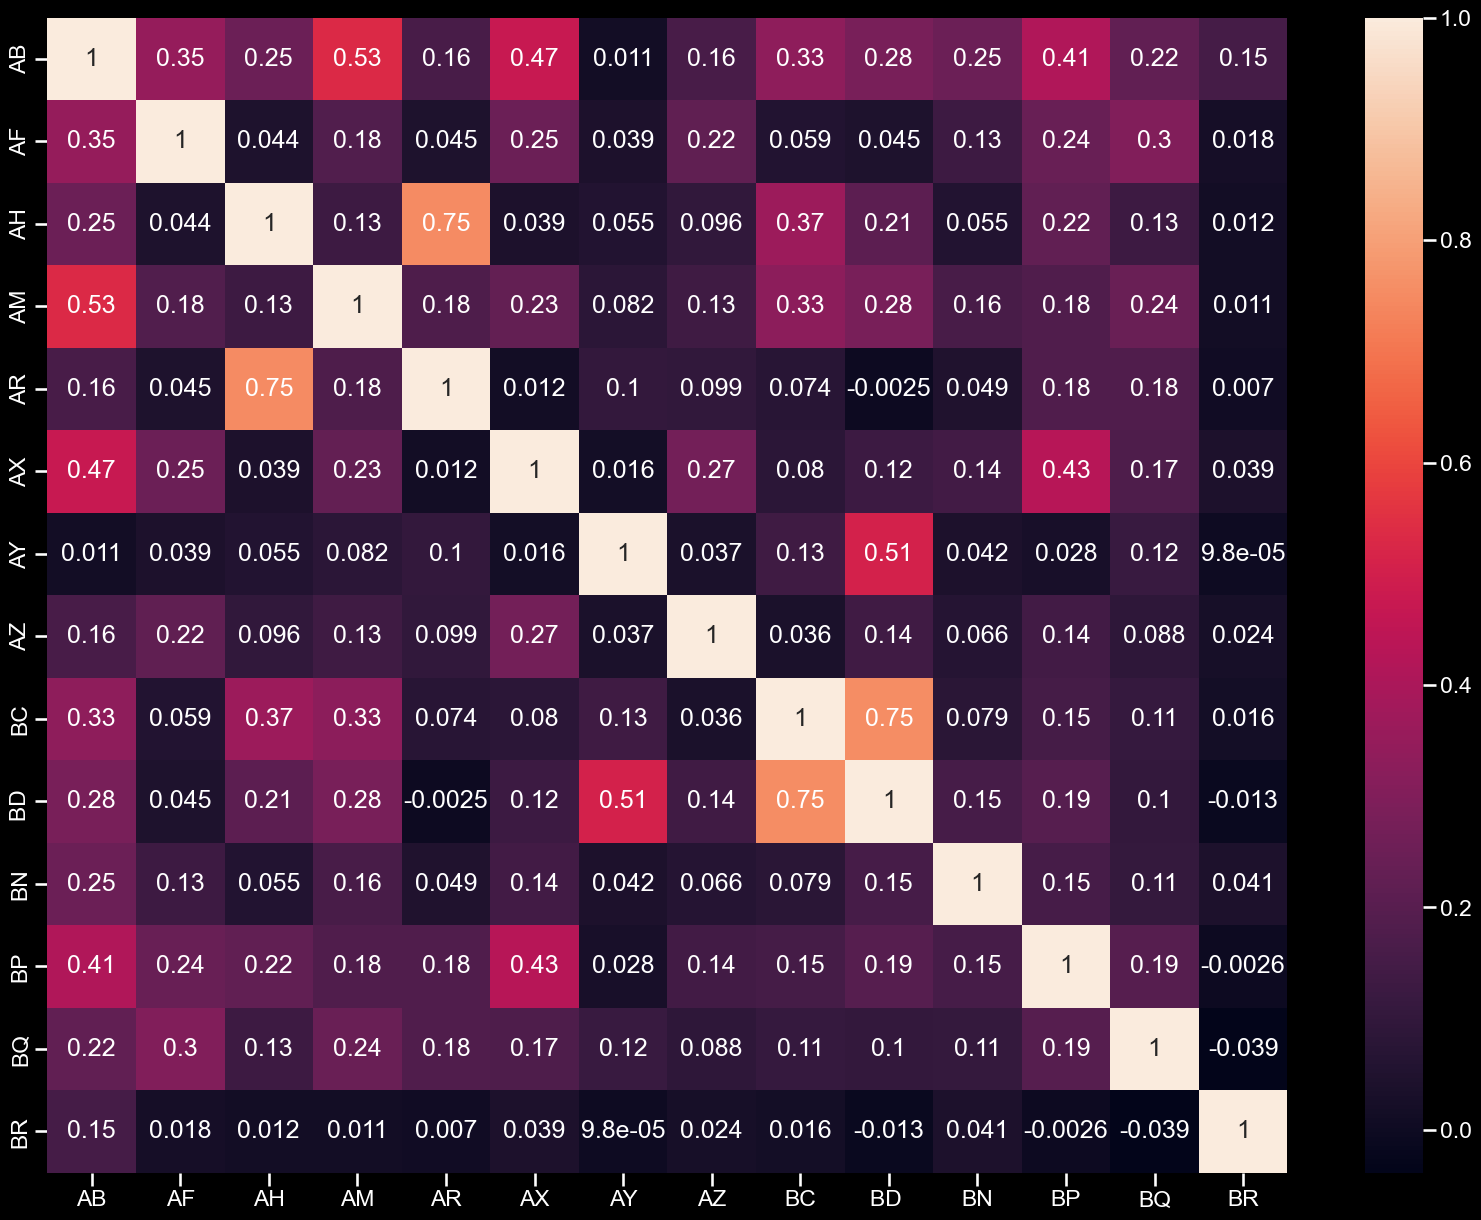

In [20]:
## correlation
plt.figure(figsize=(20,15))
sns.heatmap(data[numeric_columns[:14]].corr(), annot=True)
plt.savefig("correlation_1.png")

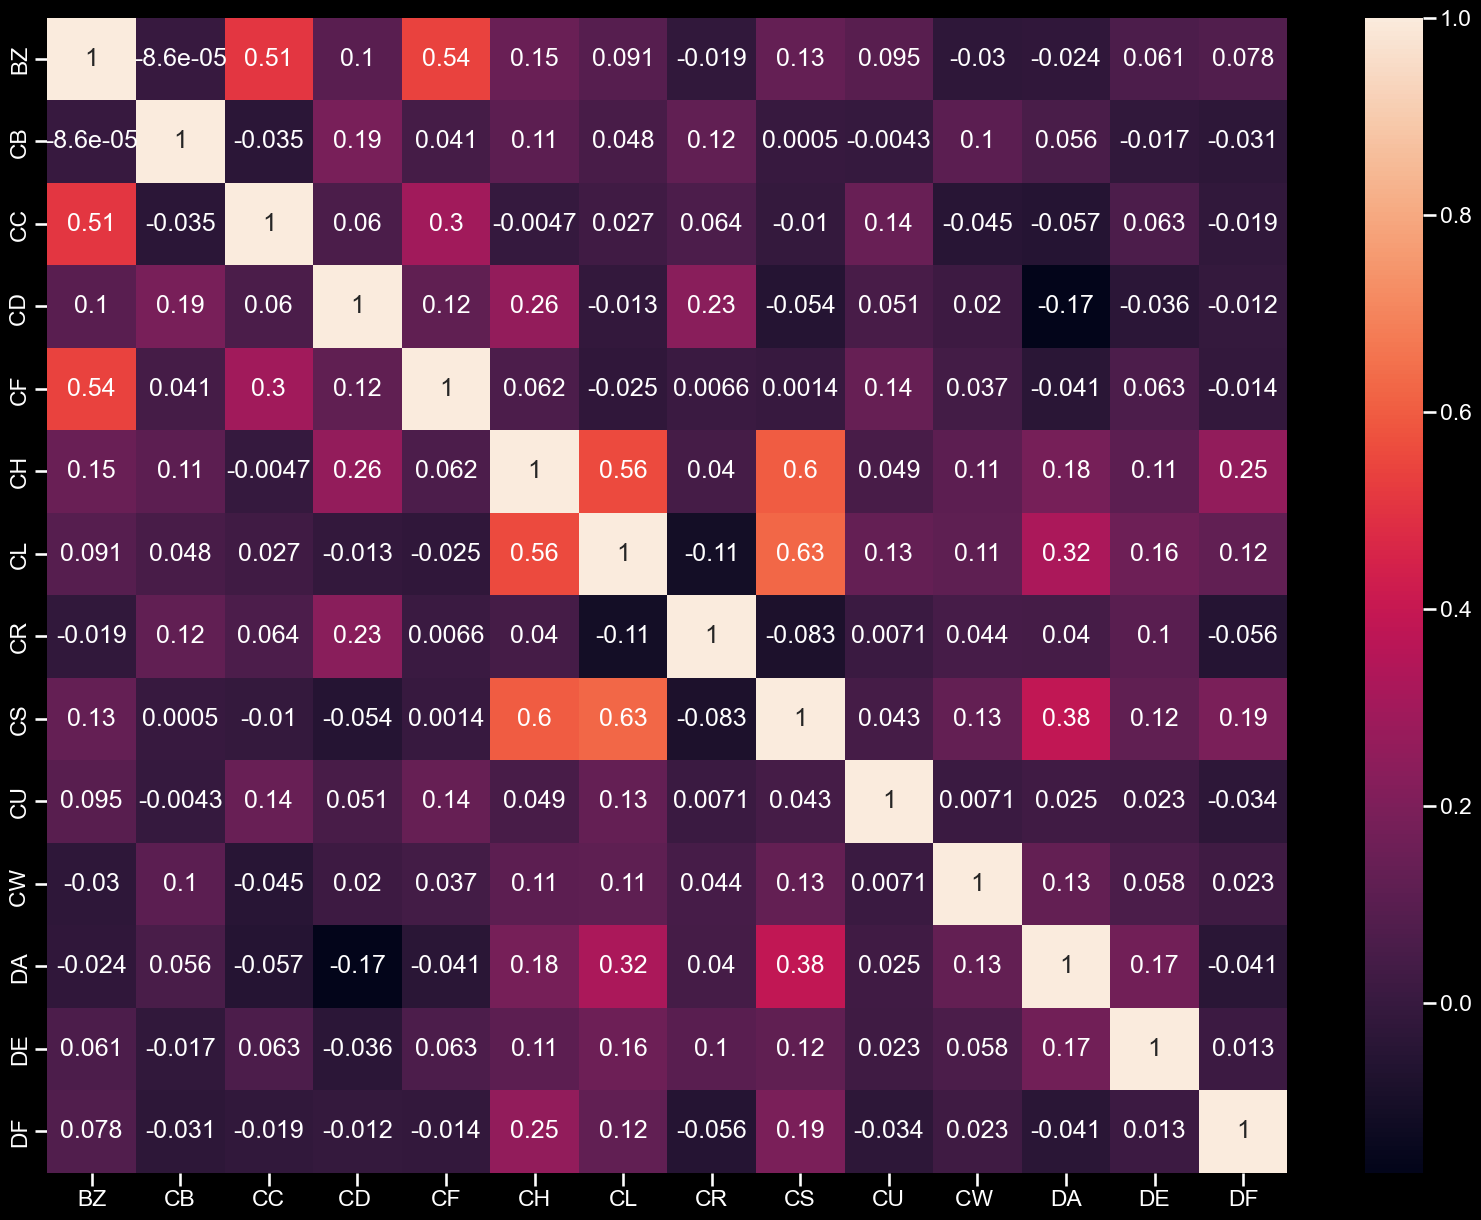

In [21]:
## correlation
plt.figure(figsize=(20,15))
sns.heatmap(data[numeric_columns[14:28]].corr(numeric_only=True), annot=True)
plt.savefig("correlation_2.png")

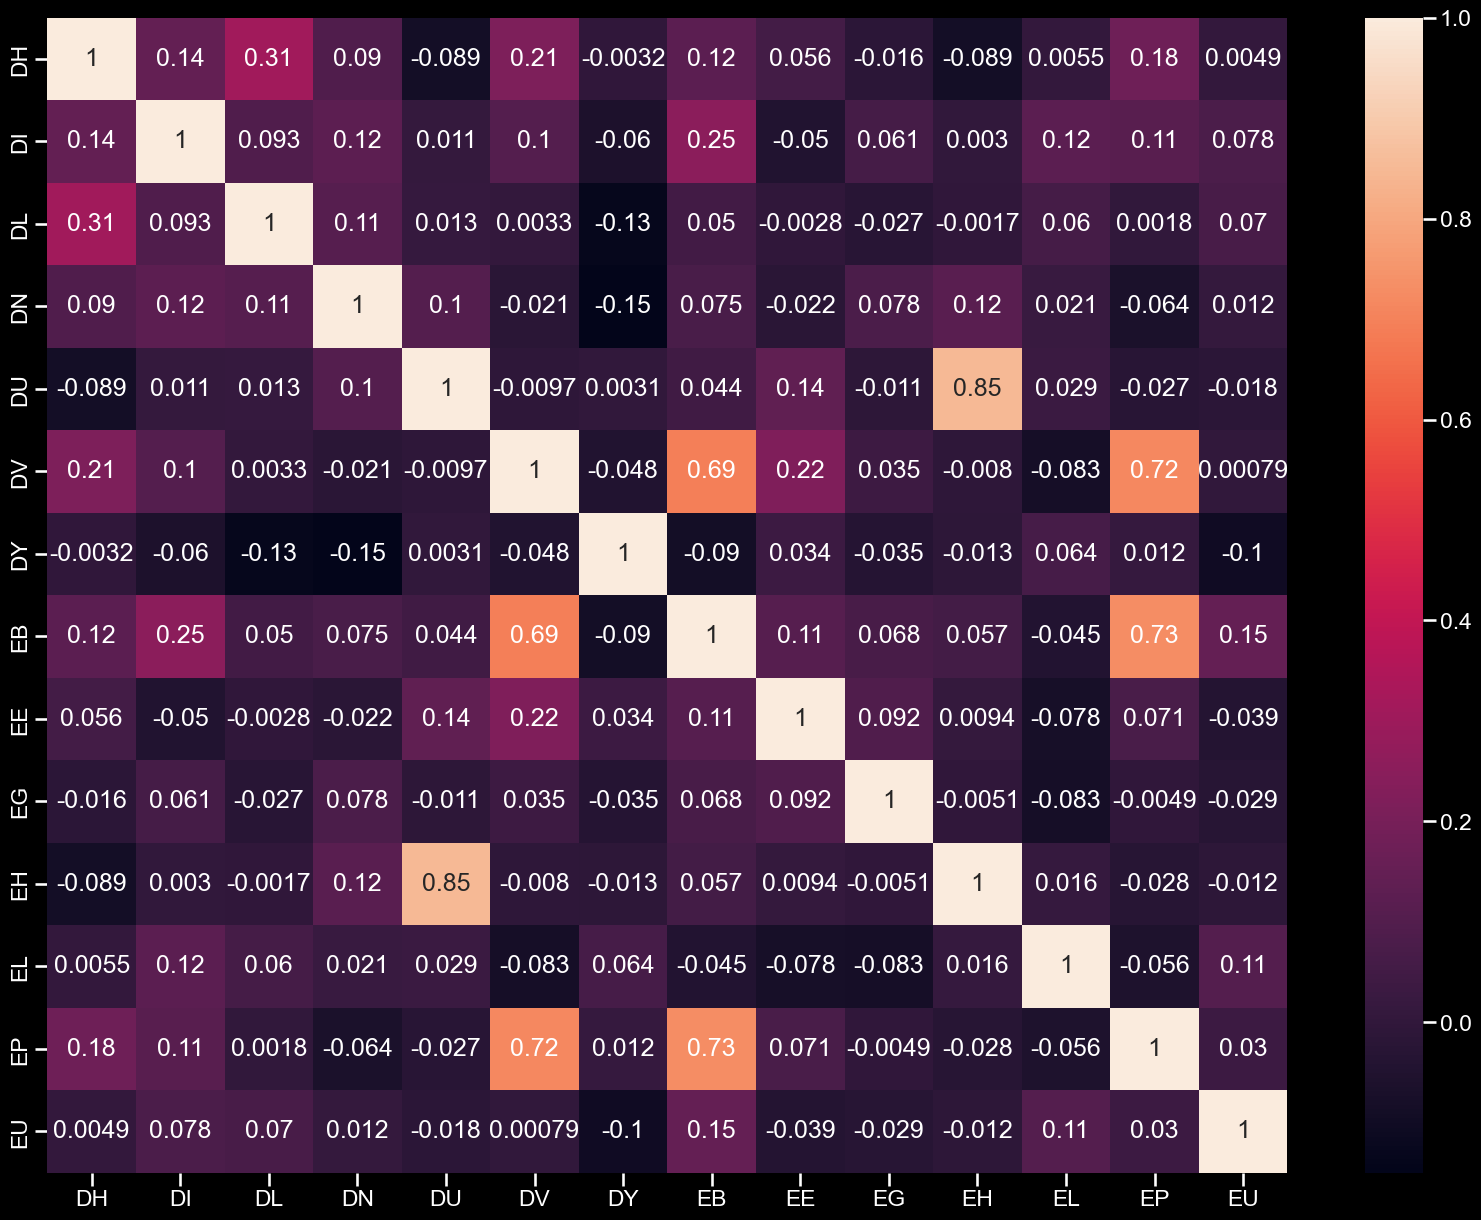

In [22]:
## correlation
plt.figure(figsize=(20,15))
sns.heatmap(data[numeric_columns[28:42]].corr(), annot=True)
plt.savefig("correlation_3.png")

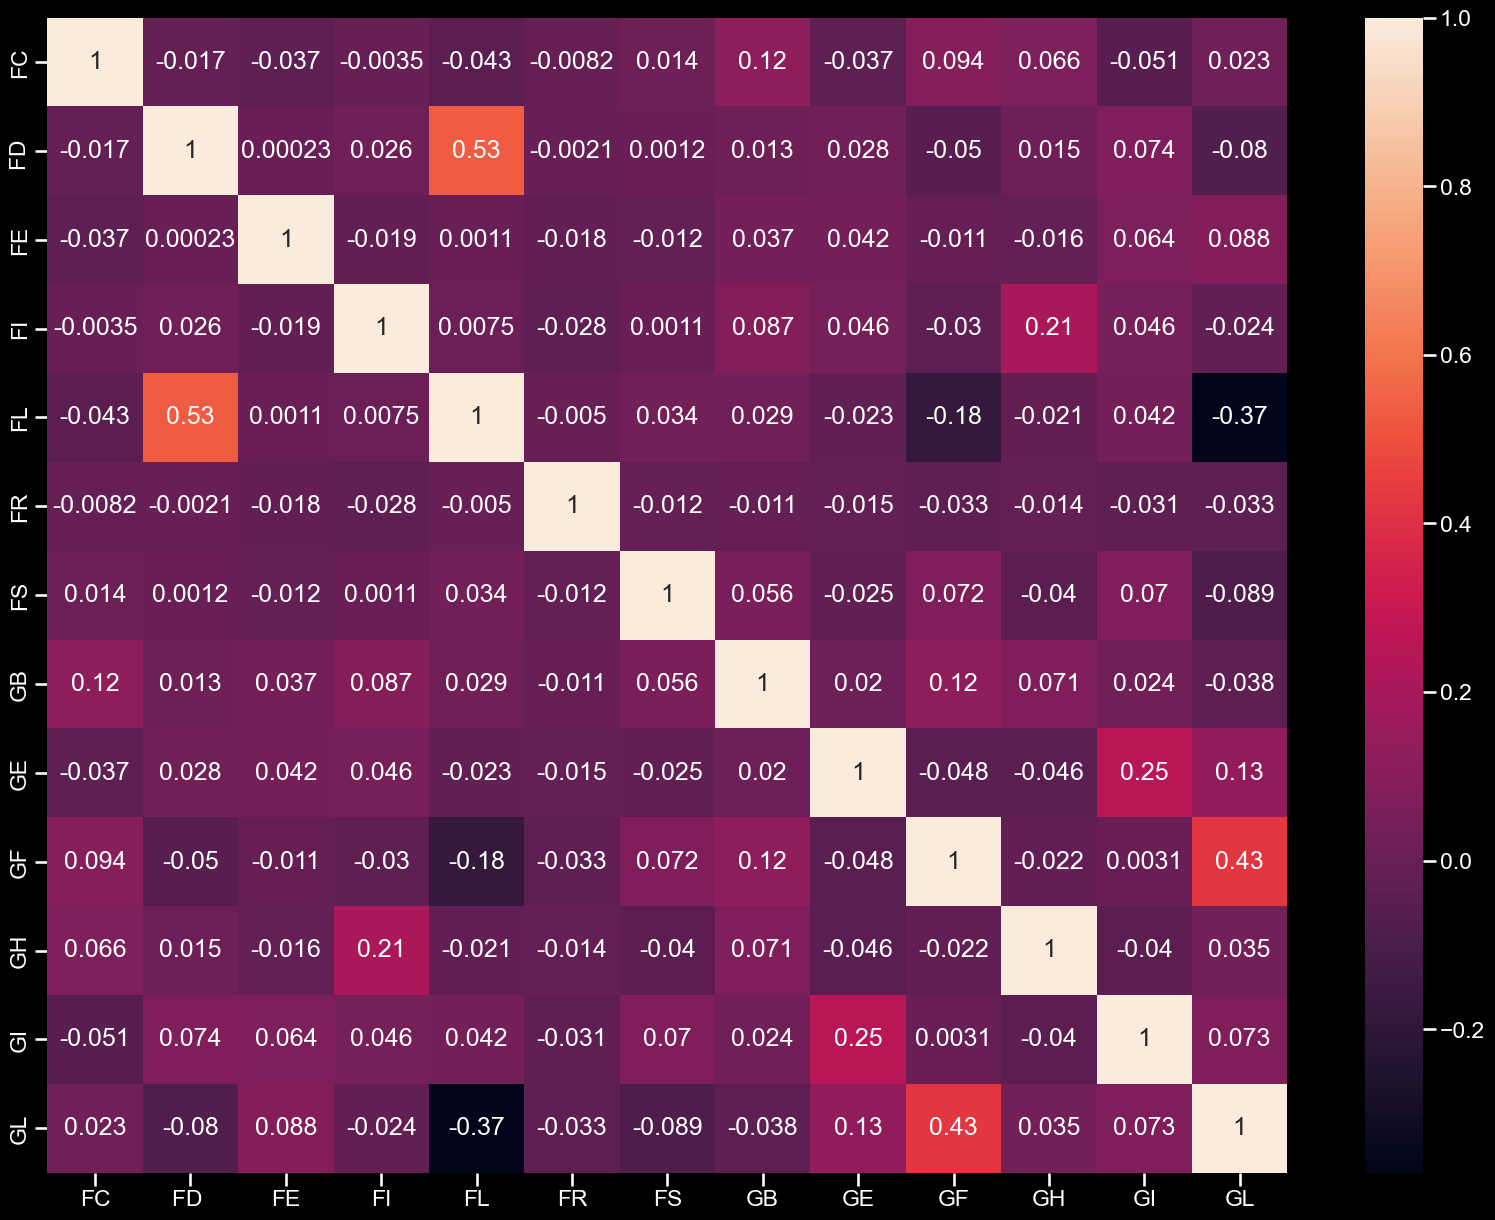

In [23]:
## correlation
plt.figure(figsize=(20,15))
sns.heatmap(data[numeric_columns[42:-1]].corr(), annot=True)
plt.savefig("correlation_4")

## 8. OUTLIER DETECTION


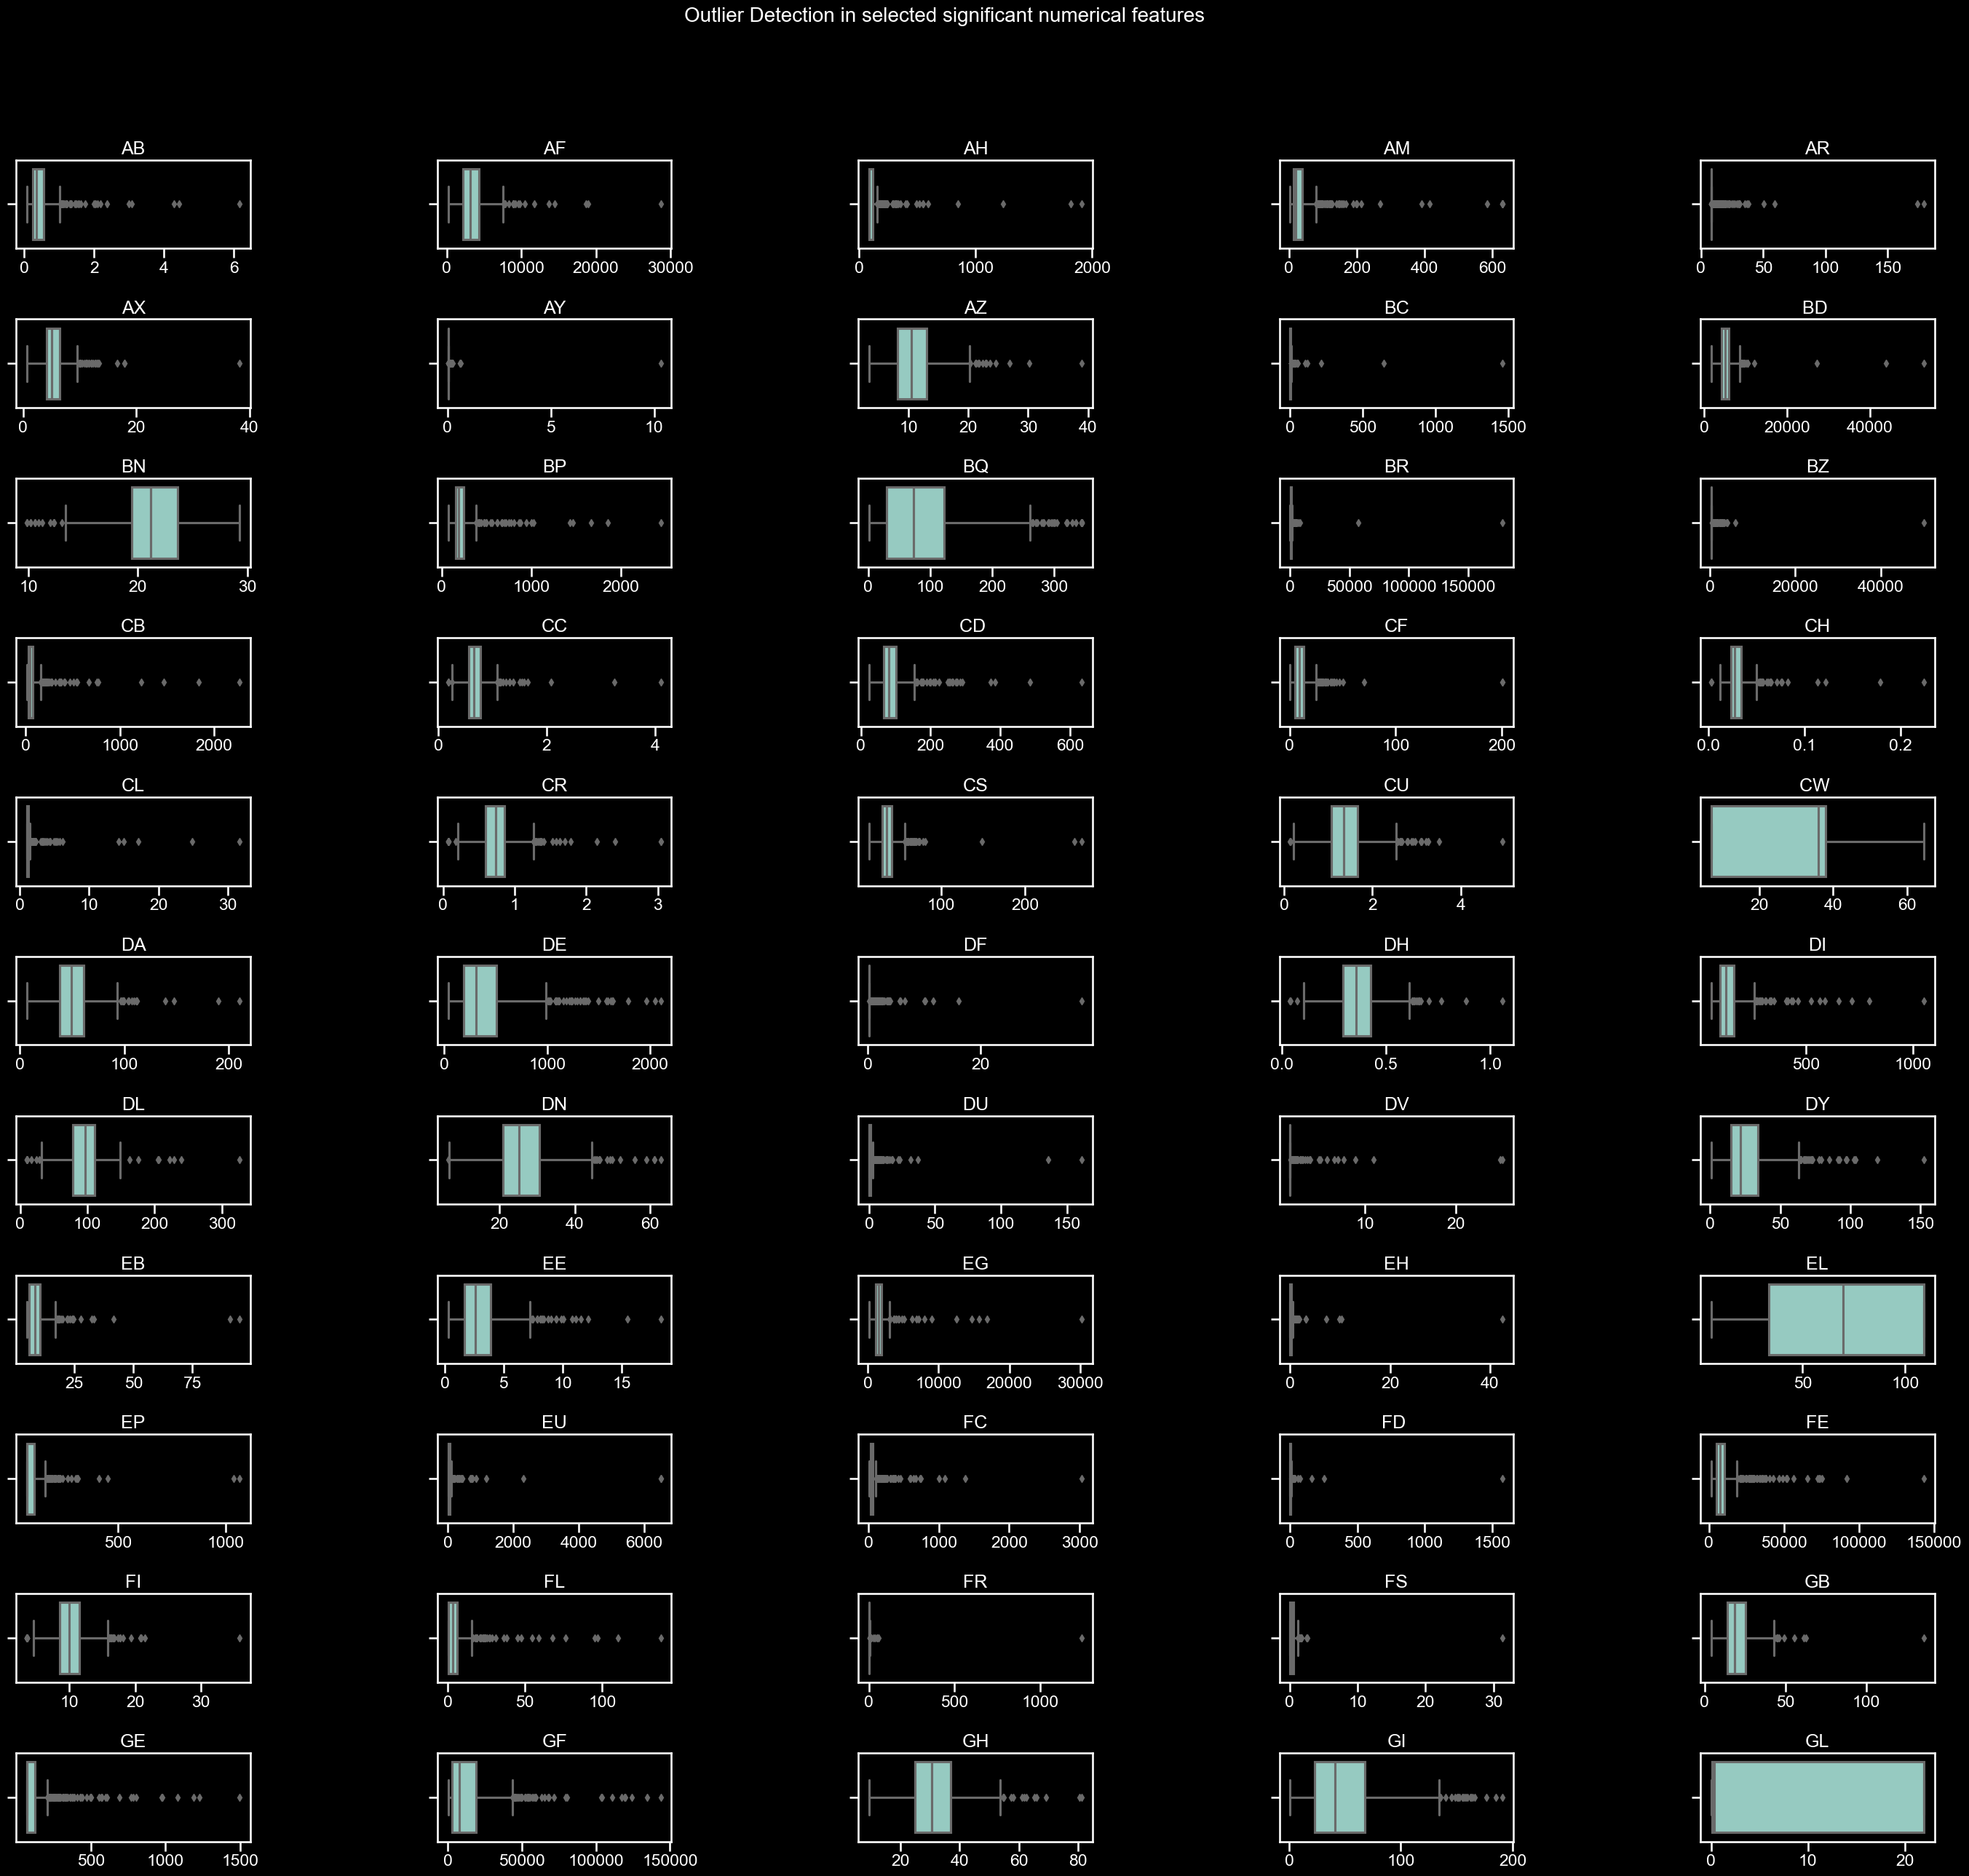

In [24]:
numeric_data = data.select_dtypes(include=["int64", "float64"])

fig, axs = plt.subplots(nrows=11, ncols=5, figsize=(34, 30))
plt.subplots_adjust(wspace =0.8, hspace=0.8)
fig.suptitle("Outlier Detection in selected significant numerical features", fontsize=20, y=0.95)

# loop through columns and axes
for col, ax in zip(numeric_data, axs.ravel()):
    
    # filter df for ticker and plot on specified axes
    sns.boxplot(data=numeric_data, x=col, ax=ax)
    ax.set(xlabel=None)
    
    # chart formatting
    ax.set_title(col.upper())

plt.show()

In [25]:
# get the limits of the outliers
def outlier_limit(dataframe: pd.DataFrame, column: str, q1=0.50, q3=0.95):
    q1 = dataframe[column].quantile(q1)
    q3 = dataframe[column].quantile(q3)
    
    IQR = q3 - q1

    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR

    return upper_limit, lower_limit


# Check the outliers
def check_outliers(dataframe: pd.DataFrame, column: str):
    
    # get the limits of the outliers
    upper_limit, lower_limit = outlier_limit(dataframe, column)

    outlier = False
    if dataframe[(dataframe[column]<lower_limit) | (dataframe[column]>upper_limit)].any(axis=None):
        outlier =  True
        print(column,":-",dataframe[column].nunique())
    else:
        outlier = False
    return outlier

In [26]:
keep_columns = data.columns.tolist()
keep_columns.remove("Id")
keep_columns.remove("EJ")
keep_columns.remove("Class")

In [27]:
for col in keep_columns:
    print(check_outliers(data,col))

AB :- 217
True
AF :- 599
True
AH :- 227
True
AM :- 605
True
AR :- 130
True
AX :- 427
True
AY :- 148
True
AZ :- 484
True
BC :- 259
True
BD  :- 617
True
BN :- 53
True
BP :- 612
True
False
BR :- 566
True
BZ :- 115
True
CB :- 554
True
CC :- 603
True
CD  :- 584
True
CF :- 586
True
CH :- 135
True
CL :- 123
True
CR :- 595
True
CS :- 576
True
CU :- 307
True
CW  :- 426
True
DA :- 611
True
False
DF :- 137
True
DH :- 191
True
DI :- 571
True
DL :- 604
True
False
DU :- 254
True
DV :- 39
True
DY :- 590
True
EB :- 439
True
EE :- 513
True
EG :- 610
True
EH :- 127
True
EL :- 312
True
EP :- 275
True
EU :- 455
True
FC :- 601
True
FD  :- 337
True
FE :- 615
True
FI :- 498
True
FL :- 389
True
FR :- 435
True
FS :- 162
True
GB :- 560
True
GE :- 264
True
GF :- 611
True
GH :- 596
True
False
False


In [28]:
# Replace outliers with mean
def capping_outliers(dataframe, column):
    # filling outliers with upper limit by upper limit and lower limit by lower limit:
    up_limit, low_limit=outlier_limit(dataframe, column)

    # mean = dataframe.loc[dataframe[column]<low_limit, column].mean()
    dataframe[column] = np.where(dataframe[column] > up_limit, up_limit, dataframe[column])
    dataframe[column] = np.where(dataframe[column] < low_limit, low_limit, dataframe[column])
    return dataframe




# replace the outliers
for col in keep_columns:
    capping_outliers(data, col)

In [29]:
for col in keep_columns:
    print(check_outliers(data,col))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


## 9. DATA PREPROCESSING


In [30]:
def label_encoding(dataframe: pd.DataFrame, column: str):
    if dataframe[column].dtype == 'object':
        if dataframe[column].nunique() <= 2:
            le = LabelEncoder()
            dataframe[column] = le.fit_transform(dataframe[column])
            # return dataframe
            
        elif dataframe[column].nunique() > 2 and dataframe[column].nunique() <= 10:
            ohe = OneHotEncoder()
            dataframe[column] = ohe.fit_transform(dataframe[column])
            # return dataframe
    else:
        dataframe

for col in data.columns[1:-1]:
    label_encoding(data, col)

In [31]:
data.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ         BC  ...        FL        FR  \
0  0.699861  0.025578   9.812214   5.555634  ...  7.298162  1.738550   
1  3.632190  0.025578  13.517790   1.229900  ...  0.173229  0.497060   
2  6.732840  0.025578  12.824570   1.229900  ...  7.709560  0.975560   
3  3.685344  0.025578  11.053708   1.229900  ...  6.122162  0.497060   
4  3.942255  0.054810   3.396778  28.147140  ...  8.153058  3.998665   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  Class  
0   0.120343      1  
1  21.978000      0  
2   0.196941      0  
3   0.155829      0  
4   0.096614      1  

[5 rows x 58 columns]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

## Feature Scalling

In [33]:
# label encoding:

data = data.drop(["Id"],axis=1)

for i in data.columns[:-1]:
    Mm_sclr = MinMaxScaler(feature_range=(0,1))
    data[i]=Mm_sclr.fit_transform(data[[i]])

data.head()

AB        AF       AH        AM   AR        AX        AY        AZ  \
0  0.061475  0.232916  0.00000  0.078158  0.0  0.000000  0.000000  0.278142   
1  0.030738  0.062786  0.00000  0.137435  0.0  0.197200  0.000000  0.438798   
2  0.186475  0.195066  0.00000  0.118693  0.0  0.405719  0.000000  0.408743   
3  0.081967  0.289668  0.11219  0.300705  0.0  0.200775  0.000000  0.331967   
4  0.143443  0.282751  0.00000  0.044439  0.0  0.218052  0.118812  0.000000   

         BC       BD   ...        FL        FR        FS        GB        GE  \
0  0.160705  0.227421  ...  0.171862  0.354549  0.011004  0.119559  0.000000   
1  0.000000  0.355513  ...  0.000000  0.000000  0.203576  0.085751  0.000000   
2  0.000000  0.321755  ...  0.181785  0.136652  0.459422  0.544777  0.024356   
3  0.000000  0.231448  ...  0.143495  0.000000  0.088033  0.238350  0.014928   
4  1.000000  0.377181  ...  0.192483  1.000000  0.022008  0.203312  0.111896   

         GF        GH        GI        GL  Class  
0  0.018045  0.191389  0.362261  0.005425      1  
1  0.253512  0.296838  0.164135  1.000000      0  
2  0.123852  0.280076  0.180218  0.008910      0  
3  0.018865  0.459749  0.470820  0.007039      0  
4  0.077148  0.541597  0.185841  0.004345      1  

[5 rows x 57 columns]

In [34]:
# Saving new dataset
data.to_csv(f"{path}/Cleaned_data.csv")

## 10. MODEL TRAINING AND EVALUATING

## 11. FEATURE IMPORTANCE

## 12 AUC-ROC

## 13. MODEL TUNING

## 14. CONCLUSION